# NYPD Arrest Data (Historic)

## Objective- Explore NYC arrest data trends for felonies by borough and year.

### Find data set and upload to Github:
1. Search for NYPD dataset in Open Data
2. Copy URL link and open Excel
3. Import data from URL to Excel
4. Transform data- delete columns to reduce size
5. Load data and save as .csv
6. Download Git LFS and complete prompts to load file to Git Repository

### Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Make a list of missing value types:

In [2]:
missing_values = ["NaN", "--"]

### Import NYC NYPD arrest dataset:

In [3]:
df = pd.read_csv('https://media.githubusercontent.com/media/Louisianaw/NY-CRIME-DATA/main/NYCRIMEDATA.csv', na_values = missing_values)

### Explore data by viewing the first 5 rows and last 5 rows:

In [4]:
df

,ARREST_KEY,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,236791704,11/22/2021,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK
1,237354740,12/4/2021,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC
2,236081433,11/9/2021,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK
3,32311380,6/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK
4,192799737,1/26/2019,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,172004524,11/27/2017,"FUGITIVE,FROM OTHER STATES",995.0,F.C.A. P.I.N.O.S.,FOA9000016,NaN,K,78,0.0,25-44,M,WHITE HISPANIC
1048571,172394866,12/8/2017,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,M,6,1.0,25-44,M,WHITE HISPANIC
1048572,171677235,11/18/2017,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,B,52,0.0,25-44,M,BLACK HISPANIC
1048573,172586806,12/13/2017,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,S,121,0.0,45-64,F,BLACK


### View list of column labels:

In [5]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE'],
      dtype='object')

### Use info() method to print information about the data set (number of columns, column labels, total non-null cells, data types, memory usage):

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ARREST_KEY         1048575 non-null  int64  
 1   ARREST_DATE        1048575 non-null  object 
 2   PD_DESC            1045466 non-null  object 
 3   KY_CD              1045466 non-null  float64
 4   OFNS_DESC          1045466 non-null  object 
 5   LAW_CODE           1048457 non-null  object 
 6   LAW_CAT_CD         1041769 non-null  object 
 7   ARREST_BORO        1048575 non-null  object 
 8   ARREST_PRECINCT    1048575 non-null  int64  
 9   JURISDICTION_CODE  1048569 non-null  float64
 10  AGE_GROUP          1048558 non-null  object 
 11  PERP_SEX           1048575 non-null  object 
 12  PERP_RACE          1048575 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 104.0+ MB


### Drop columns to reduce data set:

In [7]:
drop_cols = ['KY_CD', 'LAW_CODE']
df.drop(drop_cols, inplace=True, axis=1)

### View first 5 rows of data to confirm columns were dropped:

In [8]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,236791704,11/22/2021,NaN,NaN,M,M,28,0.0,45-64,M,BLACK
1,237354740,12/4/2021,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC
2,236081433,11/9/2021,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,Q,113,0.0,25-44,M,BLACK
3,32311380,6/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,1.0,18-24,M,BLACK
4,192799737,1/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK


### Rename column labels to improve readability:

In [9]:
df = df.rename(columns = {'ARREST_KEY':'Arrest ID', 'ARREST_DATE':'Arrest Date', 'PD_DESC':'PD Description', 'OFNS_DESC':'Offense Description',
       'LAW_CAT_CD':'Offense Level', 'ARREST_BORO':'Arrest Borough', 'ARREST_PRECINCT':'Arrest Precinct', 'JURISDICTION_CODE':'Jurisdiction Code', 'AGE_GROUP':'Age Group', 'PERP_SEX':'Perp Sex', 'PERP_RACE':'Perp Race'})
df

,Arrest ID,Arrest Date,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race
0,236791704,11/22/2021,NaN,NaN,M,M,28,0.0,45-64,M,BLACK
1,237354740,12/4/2021,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC
2,236081433,11/9/2021,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,Q,113,0.0,25-44,M,BLACK
3,32311380,6/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,1.0,18-24,M,BLACK
4,192799737,1/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK
...,...,...,...,...,...,...,...,...,...,...,...
1048570,172004524,11/27/2017,"FUGITIVE,FROM OTHER STATES",F.C.A. P.I.N.O.S.,NaN,K,78,0.0,25-44,M,WHITE HISPANIC
1048571,172394866,12/8/2017,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,M,M,6,1.0,25-44,M,WHITE HISPANIC
1048572,171677235,11/18/2017,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,M,B,52,0.0,25-44,M,BLACK HISPANIC
1048573,172586806,12/13/2017,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,S,121,0.0,45-64,F,BLACK


### Add a column for arrest 'Year':

In [10]:
from datetime import datetime
df['Year'] = pd.DatetimeIndex(df['Arrest Date']).year
df

,Arrest ID,Arrest Date,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race,Year
0,236791704,11/22/2021,NaN,NaN,M,M,28,0.0,45-64,M,BLACK,2021
1,237354740,12/4/2021,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC,2021
2,236081433,11/9/2021,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,Q,113,0.0,25-44,M,BLACK,2021
3,32311380,6/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,1.0,18-24,M,BLACK,2007
4,192799737,1/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,172004524,11/27/2017,"FUGITIVE,FROM OTHER STATES",F.C.A. P.I.N.O.S.,NaN,K,78,0.0,25-44,M,WHITE HISPANIC,2017
1048571,172394866,12/8/2017,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,M,M,6,1.0,25-44,M,WHITE HISPANIC,2017
1048572,171677235,11/18/2017,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,M,B,52,0.0,25-44,M,BLACK HISPANIC,2017
1048573,172586806,12/13/2017,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,S,121,0.0,45-64,F,BLACK,2017


### Drop 'Arrest Date' column:

In [11]:
drop_cols = ['Arrest Date']
df.drop(drop_cols, inplace=True, axis=1)
df

,Arrest ID,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race,Year
0,236791704,NaN,NaN,M,M,28,0.0,45-64,M,BLACK,2021
1,237354740,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC,2021
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,Q,113,0.0,25-44,M,BLACK,2021
3,32311380,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,1.0,18-24,M,BLACK,2007
4,192799737,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK,2019
...,...,...,...,...,...,...,...,...,...,...,...
1048570,172004524,"FUGITIVE,FROM OTHER STATES",F.C.A. P.I.N.O.S.,NaN,K,78,0.0,25-44,M,WHITE HISPANIC,2017
1048571,172394866,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,M,M,6,1.0,25-44,M,WHITE HISPANIC,2017
1048572,171677235,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,M,B,52,0.0,25-44,M,BLACK HISPANIC,2017
1048573,172586806,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,S,121,0.0,45-64,F,BLACK,2017


### Check for missing values:

In [12]:
df.isnull().sum().sum()

13047

### Drop missing values. This will reduce the total count of rows:

In [13]:
df.dropna()

,Arrest ID,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race,Year
1,237354740,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC,2021
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,Q,113,0.0,25-44,M,BLACK,2021
3,32311380,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,1.0,18-24,M,BLACK,2007
4,192799737,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK,2019
7,236106641,"ARSON 2,3,4",ARSON,F,B,41,72.0,25-44,M,WHITE HISPANIC,2021
...,...,...,...,...,...,...,...,...,...,...,...
1048569,172354139,"GAMBLING 2, PROMOTING, POLICY-LOTTERY",GAMBLING,M,K,67,0.0,45-64,M,BLACK,2017
1048571,172394866,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,M,M,6,1.0,25-44,M,WHITE HISPANIC,2017
1048572,171677235,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,M,B,52,0.0,25-44,M,BLACK HISPANIC,2017
1048573,172586806,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,S,121,0.0,45-64,F,BLACK,2017


### Filter rows by:
1. Felony Offense Level (F)
2. Jurisdiction Code to NYPD only (less than 3) 
3. Recent 3 years (2019-2021)

In [14]:
df1= df[(df['Offense Level']=='F') & (df['Jurisdiction Code']<3) & (df['Year']>2018)]
df1

,Arrest ID,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race,Year
1,237354740,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC,2021
4,192799737,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK,2019
5,193260691,NaN,NaN,F,M,14,0.0,25-44,M,UNKNOWN,2019
6,237291769,NaN,NaN,F,Q,115,0.0,25-44,M,BLACK,2021
8,238383628,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,Q,113,0.0,18-24,M,BLACK,2021
...,...,...,...,...,...,...,...,...,...,...,...
511604,223177507,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,K,84,0.0,25-44,M,BLACK,2021
511608,223362860,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,K,75,0.0,25-44,M,WHITE HISPANIC,2021
511609,223538337,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,K,67,0.0,25-44,M,BLACK,2021
511610,222833413,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,F,M,18,0.0,25-44,M,BLACK HISPANIC,2021


### Noticed the non-standard missing values (NaN) returned. Find out how many there are:

In [15]:
df1.isnull().sum().sum()

384

### Drop the missing values and rename the dataframe to df1:

In [16]:
df1.dropna()

,Arrest ID,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race,Year
1,237354740,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC,2021
4,192799737,SEXUAL ABUSE,SEX CRIMES,F,M,25,0.0,45-64,M,BLACK,2019
8,238383628,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,Q,113,0.0,18-24,M,BLACK,2021
12,237580757,STRANGULATION 1ST,FELONY ASSAULT,F,M,30,0.0,25-44,M,BLACK,2021
16,220422940,RAPE 1,RAPE,F,Q,112,0.0,25-44,M,BLACK,2020
...,...,...,...,...,...,...,...,...,...,...,...
511604,223177507,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,K,84,0.0,25-44,M,BLACK,2021
511608,223362860,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,K,75,0.0,25-44,M,WHITE HISPANIC,2021
511609,223538337,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,K,67,0.0,25-44,M,BLACK,2021
511610,222833413,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,F,M,18,0.0,25-44,M,BLACK HISPANIC,2021


### Visualize relationships between variables within the dataset using Pairplot:

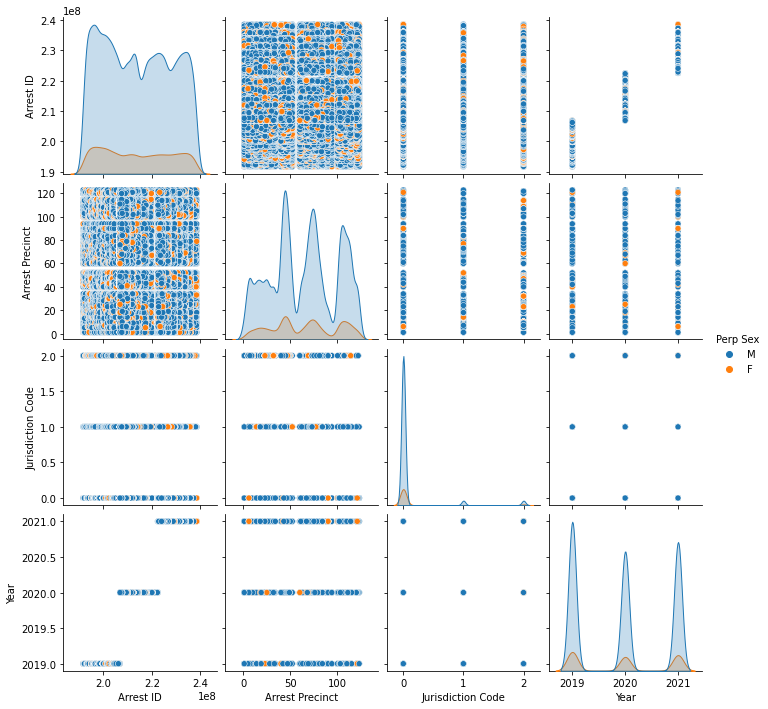

In [17]:
sns.pairplot(df1,hue='Perp Sex')

### Find the count of felony arrests by sex, borough, year:

In [18]:
df1.groupby(['Arrest Borough','Year'])['Offense Level'].count()

Arrest Borough  Year
B               2019    17022
                2020    13566
                2021    14661
K               2019    25707
                2020    19847
                2021    20781
M               2019    18211
                2020    14207
                2021    16332
Q               2019    16514
                2020    13606
                2021    14666
S               2019     3404
                2020     2833
                2021     3030
Name: Offense Level, dtype: int64

### Visualize total count of felonies by borough over from 2019-2021:

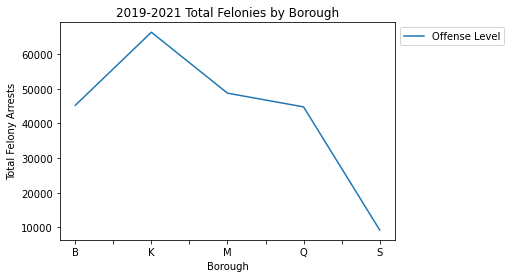

In [19]:
df1.groupby(['Arrest Borough'])['Offense Level'].count().plot()
plt.title("2019-2021 Total Felonies by Borough")
plt.ylabel("Total Felony Arrests")
plt.xlabel("Borough")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Filter Year to 2021. Name dataframe df2:

In [20]:
df2 = df1[df1['Year']==2021]
df2

,Arrest ID,PD Description,Offense Description,Offense Level,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Perp Sex,Perp Race,Year
1,237354740,RAPE 3,RAPE,F,B,41,0.0,25-44,M,WHITE HISPANIC,2021
6,237291769,NaN,NaN,F,Q,115,0.0,25-44,M,BLACK,2021
8,238383628,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,Q,113,0.0,18-24,M,BLACK,2021
12,237580757,STRANGULATION 1ST,FELONY ASSAULT,F,M,30,0.0,25-44,M,BLACK,2021
17,237954587,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,F,M,1,0.0,25-44,M,WHITE,2021
...,...,...,...,...,...,...,...,...,...,...,...
511604,223177507,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,K,84,0.0,25-44,M,BLACK,2021
511608,223362860,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,K,75,0.0,25-44,M,WHITE HISPANIC,2021
511609,223538337,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,K,67,0.0,25-44,M,BLACK,2021
511610,222833413,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,F,M,18,0.0,25-44,M,BLACK HISPANIC,2021


### Count total felonies in 2021 by borough and sort by descending values:

In [21]:
df2.groupby(['Arrest Borough','Year'])['Offense Level'].count().sort_values(ascending=False)

Arrest Borough  Year
K               2021    20781
M               2021    16332
Q               2021    14666
B               2021    14661
S               2021     3030
Name: Offense Level, dtype: int64

### Plot total felonies by borough in 2021:

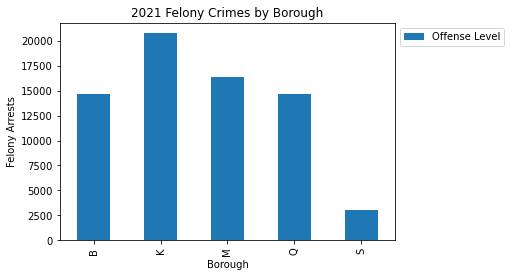

In [22]:
df2.groupby(['Arrest Borough'])['Offense Level'].count().plot(kind='bar',x='Arrest Borough',y= 'Offense Level')
plt.title("2021 Felony Crimes by Borough")
plt.ylabel("Felony Arrests")
plt.xlabel("Borough")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Visualize total felonies in 2021 by sex: 

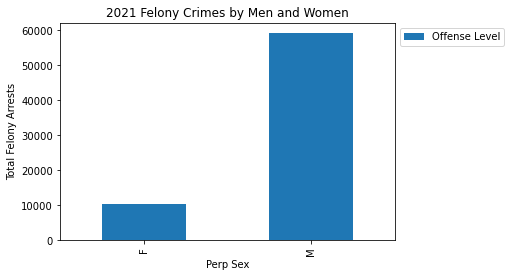

In [23]:
df2.groupby(['Perp Sex'])['Offense Level'].count().plot(kind='bar',x='Arrest Borough',y= 'Offense Level')
plt.title("2021 Felony Crimes by Men and Women")
plt.ylabel("Total Felony Arrests")
plt.xlabel("Perp Sex")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.set_palette("husl",3)
plt.show()

### Count total felonies by sex in 2021 by borough:

In [24]:
df2.groupby(['Arrest Borough','Perp Sex'])['Offense Level'].count().sort_values(ascending=False)

Arrest Borough  Perp Sex
K               M           17739
M               M           13913
Q               M           12476
B               M           12472
K               F            3042
S               M            2565
M               F            2419
Q               F            2190
B               F            2189
S               F             465
Name: Offense Level, dtype: int64

### Visualize total felonies by sex in 2021 for each borough:

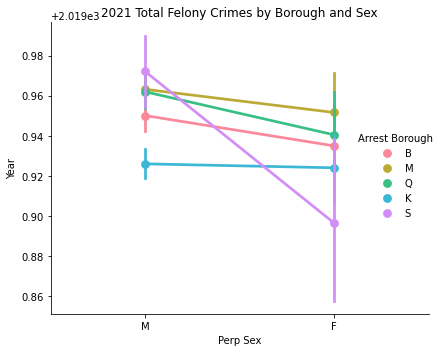

In [25]:
sns.catplot(data=df1, x="Perp Sex", y="Year", hue="Arrest Borough", kind="point")
plt.title("2021 Total Felony Crimes by Borough and Sex")
plt.ylabel("Year")
plt.xlabel("Perp Sex")
plt.tight_layout()
plt.show()

## Conclusion:
### Over the past 3 years, Brooklyn had the most felony crimes while Staten Island had the least. Men are arrested about 6 times more than women for felony crimes. 